### KNN (K- Nearest Neighbours)

- k is the no of nearest neighbours
- it tries to classify the data based on the similarity of data points

- first we need to select k value and we add new data point then it takes the k value nearest point using by finding the distance between the new point and remaining points in our dataset as k value only.
- Next it ckecks the majority votes value and predict that as result 

##### Applications
- In recommended systems


#### Steps to perform are:

- calculate the distance  ---> it use the Euclidean distance(d) (or) manhattan distance
    - formula : d = sqrt((x2-x1)^2 + (y2-y1)^2)
- find the closet neighbours(choose the value of k)
- vote for labels (predicted as output)

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/shirt.csv")

In [4]:
df

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [5]:
df.isnull().sum()

Height    0
Weight    0
Size      0
dtype: int64

In [6]:
### split data

x = df[df.columns[:-1]]
y = df['Size'] 

In [8]:
M = df[df['Size'] == 'M']

In [9]:
L = df[df['Size'] == 'L']

In [10]:
### gruopby  ----> to group the elements by particular col

g = df.groupby(by = 'Size')

In [11]:
### To get the particular elements from group 

g.get_group('M')

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M


In [12]:
g.get_group("L")

,Height,Weight,Size
7,160,64,L
8,163,64,L
9,165,61,L
10,165,61,L
11,165,62,L
12,168,62,L
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L


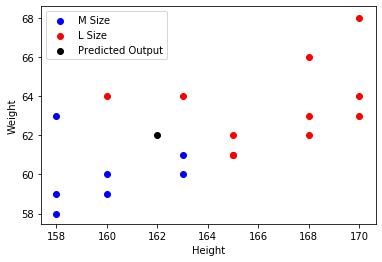

In [19]:
### plot the data

import matplotlib.pyplot as plt

plt.scatter(M["Height"],M["Weight"],c = 'blue', label = "M Size")
plt.scatter(L["Height"],L["Weight"],c = 'red', label = "L Size")
plt.scatter(162,62,c = 'k', label = 'Predicted Output')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.show()

In [33]:
### Select x & y

x = df[df.columns[:-2]]
y = df['target'] 

In [31]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
Name: target, dtype: int32

In [34]:
x

,Height,Weight
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60
5,163,60
6,163,61
7,160,64
8,163,64
9,165,61


In [26]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
df['target'] = model.fit_transform(df['Size'])

In [28]:
df

,Height,Weight,Size,target
0,158,58,M,1
1,158,59,M,1
2,158,63,M,1
3,160,59,M,1
4,160,60,M,1
5,163,60,M,1
6,163,61,M,1
7,160,64,L,0
8,163,64,L,0
9,165,61,L,0


In [35]:
from sklearn.neighbors import KNeighborsClassifier

nb = KNeighborsClassifier(n_neighbors=4)  ### to give k value attribute is n_neighbors
nb.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [37]:
y_pred = nb.predict([[162,62]])

In [38]:
y_pred

array([1])

In [53]:
y_pred = nb.predict(x)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y,y_pred)*100

88.88888888888889

In [56]:
confusion_matrix(y,y_pred)   ### here we get first diagonal values as true postive and true negative

array([[11,  0],
       [ 2,  5]], dtype=int64)

##### two other metrics we use other than accuracy
- By using precision and recall we can see whether our data is balanced or imbalanaced. 

- if we get precision and recall same then it is balanced data. 
- if it is zero (or) not same then it is imbalanaced data and we need to balance by using sampling. 

- Precision = correct values / total predicted values
    - formula : precision = tp/(tp+fp)
- Recall = correct values / total actual values
    - formula : recall = tp/(tp+fn)
    
- tp,fp -> true positive,false positive
- tn,fn -> true negative,false negative

In [58]:
from sklearn.metrics import precision_score,recall_score
precision_score(y,y_pred)

1.0

In [59]:
recall_score(y,y_pred)

0.7142857142857143

### Heart Diease dataset

In [67]:
df = pd.read_csv("Heart.csv")

In [68]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [70]:
df.shape

(303, 14)

In [72]:
x = df[df.columns[:-1]]
y = df['target']

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state = 40)

In [102]:
from sklearn.neighbors import KNeighborsClassifier

nb = KNeighborsClassifier(n_neighbors=3)  ### to give k value attribute is n_neighbors
nb.fit(x_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [106]:
### to perform so range of numbers to k value
l = []
for i in range(1,40):
    nb = KNeighborsClassifier(n_neighbors=i)
    nb.fit(x_train,y_train)
    y_pred = nb.predict(x_test)
    l.append(accuracy_score(y_test,y_pred))

In [107]:
l

[0.5934065934065934,
 0.6043956043956044,
 0.6703296703296703,
 0.6153846153846154,
 0.6923076923076923,
 0.6703296703296703,
 0.6813186813186813,
 0.6593406593406593,
 0.6703296703296703,
 0.6923076923076923,
 0.6923076923076923,
 0.6703296703296703,
 0.6813186813186813,
 0.6813186813186813,
 0.6703296703296703,
 0.7142857142857143,
 0.7142857142857143,
 0.7362637362637363,
 0.7362637362637363,
 0.7142857142857143,
 0.7252747252747253,
 0.7142857142857143,
 0.7142857142857143,
 0.7582417582417582,
 0.7252747252747253,
 0.7582417582417582,
 0.7252747252747253,
 0.7252747252747253,
 0.6923076923076923,
 0.7032967032967034,
 0.7032967032967034,
 0.7142857142857143,
 0.7032967032967034,
 0.6923076923076923,
 0.7142857142857143,
 0.6923076923076923,
 0.6813186813186813,
 0.6813186813186813,
 0.6813186813186813]

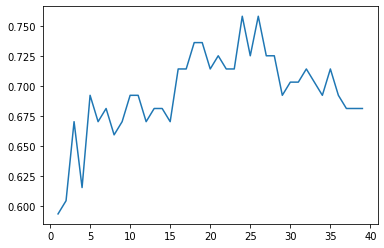

In [108]:
#### Plot the graph
x = range(1,40)
plt.plot(x,l)

In [109]:
y_pred = nb.predict(x_test)

In [111]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_test,y_pred)*100

68.13186813186813

In [112]:
confusion_matrix(y_test,y_pred)

array([[23, 17],
       [12, 39]], dtype=int64)

- Actual Values:
    - patients actually from heart disease ---> 23
    - Patients actually don't have heart disease ---> 39
- Predicted values:
    - Patients actually from heart disease ---> 17 (it shows like don't have disease but predicted as having)
    - patients actually don't have heart disease ---> 12 (it shows like having disease but predicted as not having)

In [113]:
precision_score(y_test,y_pred)

0.6964285714285714

In [114]:
recall_score(y_test,y_pred)

0.7647058823529411